## Predicting The Weather Using Machine Learning
We will read in the data and clean it up. Then will fit the data and create predictions of the the weather.

## Read in Data
We will start with reading in the data and familiarizing ourselves with it.

In [2]:
# Reading in the initial data

import pandas as pd

weather = pd.read_csv("local_weather.csv", index_col="DATE") # making 'Date' the index of the dataframe

In [3]:
weather.head(5)

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


## Data Cleaning

Since this data will be used in a machine learning model to make predictions, I will identify how many null values there are, remove columns with a lot of null values, and fill the null values when neccessary.

In [6]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [19]:
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.653360
ACSH       0.653360
AWND       0.522451
DAPR       0.999525
FMTM       0.870099
FRGT       0.999881
MDPR       0.999525
PGTM       0.495106
PRCP       0.016668
SNOW       0.324990
SNWD       0.317634
TAVG       0.879174
TMAX       0.000534
TMIN       0.000593
TSUN       0.931728
WDF1       0.653360
WDF2       0.522392
WDF5       0.527552
WDFG       0.746901
WSF1       0.653360
WSF2       0.522332
WSF5       0.527552
WSFG       0.746901
WT01       0.779939
WT02       0.980248
WT03       0.992941
WT04       0.999763
WT05       0.998339
WT07       0.999881
WT08       0.810368
WT09       0.999881
WT16       0.884038
WT18       0.999822
dtype: float64

In [8]:
core_cols = weather.columns[null_pct < 0.05] 

In [10]:
weather = weather[core_cols].copy() #making a copy so we do not get a copy warning later on

In [11]:
weather

,STATION,NAME,PRCP,TMAX,TMIN
DATE,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,49.0,30.0
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,49.0,29.0
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,54.0,35.0
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,54.0,36.0
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,55.0,33.0
...,...,...,...,...,...
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,60.0,39.0
2022-01-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,57.0,43.0
2022-01-26,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,57.0,41.0


In [13]:
weather.columns = weather.columns.str.lower() #making all column names lower case

In [24]:
weather[pd.isnull(weather['prcp'])]

,station,name,prcp,tmax,tmin
DATE,,,,,
1983-10-29,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,67.0,57.0
1983-10-30,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,70.0,63.0
1983-10-31,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,69.0,61.0
1983-11-12,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,63.0,55.0
1983-11-13,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,60.0,50.0
...,...,...,...,...,...
2013-12-15,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,58.0,33.0
2016-05-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,80.0,55.0
2016-05-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,68.0,53.0


In [25]:
weather.loc['1983-10-20':'1983-11-05']

,station,name,prcp,tmax,tmin
DATE,,,,,
1983-10-20,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.00,73.0,52.0
1983-10-21,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.00,70.0,50.0
1983-10-22,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.00,70.0,50.0
1983-10-23,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.00,69.0,60.0
1983-10-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.00,73.0,58.0
1983-10-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.00,75.0,53.0
1983-10-26,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.00,79.0,53.0
1983-10-27,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.00,82.0,56.0
1983-10-28,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.00,74.0,56.0


In [80]:
weather['prcp'].value_counts()/ weather['prcp'].shape[0]

0.00    0.827420
0.01    0.026030
0.02    0.011826
0.03    0.007250
0.04    0.006002
          ...   
1.29    0.000059
1.73    0.000059
1.05    0.000059
1.38    0.000059
1.02    0.000059
Name: prcp, Length: 176, dtype: float64

In [27]:
weather['prcp'] = weather['prcp'].fillna(0) # filling in null values with the value 0 sicne majority of 
                                            # values are already 0 

In [28]:
weather[pd.isnull(weather['tmax'])]

,station,name,prcp,tmax,tmin
DATE,,,,,
2004-11-20,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,NaN,NaN
2013-06-16,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,NaN,NaN
2019-04-18,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,NaN,50.0
2019-04-21,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,NaN,52.0
2019-04-22,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,NaN,50.0
2020-08-29,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,NaN,NaN
2020-09-08,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,NaN,NaN
2020-09-09,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,NaN,NaN
2021-10-31,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,NaN,56.0


In [29]:
weather = weather.fillna(method='ffill')

In [30]:
weather.apply(pd.isnull).sum()/weather.shape[0]

station    0.0
name       0.0
prcp       0.0
tmax       0.0
tmin       0.0
dtype: float64

In [31]:
weather.apply(lambda x: (x==9999).sum())

station    0
name       0
prcp       0
tmax       0
tmin       0
dtype: int64

In [32]:
weather.dtypes

station     object
name        object
prcp       float64
tmax       float64
tmin       float64
dtype: object

In [33]:
weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [34]:
weather.index = pd.to_datetime(weather.index)

In [35]:
weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

## Data Visualization

To gain more perspective of the data before fitting it into a model and making predictions. In this case mainly looking for any gaps in the data and if that will need to be adjusted.

<AxesSubplot:xlabel='DATE'>

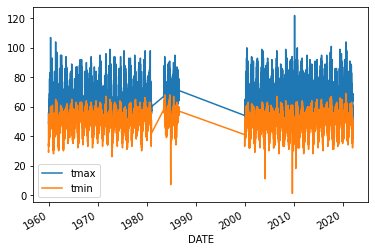

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
weather[['tmax', 'tmin']].plot()

<AxesSubplot:xlabel='DATE'>

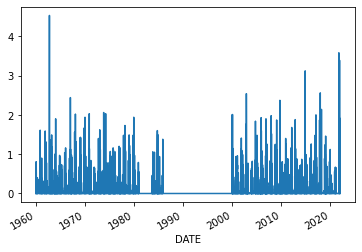

In [37]:
weather['prcp'].plot()

In [42]:
weather['target'] = weather.shift(-1)['tmax'] 

In [43]:
weather

,station,name,prcp,tmax,tmin,target
DATE,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,49.0,30.0,49.0
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,49.0,29.0,54.0
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,54.0,35.0,54.0
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,54.0,36.0,55.0
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,55.0,33.0,53.0
...,...,...,...,...,...,...
2022-01-23,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,60.0,41.0,60.0
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,60.0,39.0,57.0
2022-01-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,57.0,43.0,57.0


In [44]:
weather = weather.iloc[:-1].copy()

In [45]:
weather

,station,name,prcp,tmax,tmin,target
DATE,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,49.0,30.0,49.0
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,49.0,29.0,54.0
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,54.0,35.0,54.0
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,54.0,36.0,55.0
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,55.0,33.0,53.0
...,...,...,...,...,...,...
2022-01-22,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,69.0,44.0,60.0
2022-01-23,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,60.0,41.0,60.0
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,60.0,39.0,57.0


## Fit Data and Make Predictions

In [46]:
from sklearn.linear_model import Ridge # using Ridge as it accounts for multicollinearity/coefficients
reg = Ridge(alpha=.1)

In [47]:
predictors = ['prcp', 'tmax', 'tmin']
train_data = weather.loc[:'2020-12-31'].copy()
test_data = weather.loc['2021-01-01':].copy()

In [48]:
reg.fit(train_data[predictors], train_data['target'])

Ridge(alpha=0.1)

In [49]:
predictions = reg.predict(test_data[predictors])

In [50]:
from sklearn.metrics import mean_absolute_error

In [51]:
mean_absolute_error(test_data['target'], predictions)

3.4181875541578877

In [52]:
combo = pd.concat([test_data['target'], pd.Series(predictions, index = test_data.index)], axis = 1)
combo.columns = ['actual', 'predictions']

In [53]:
combo

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-22,60.0,67.015031
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333


<AxesSubplot:xlabel='DATE'>

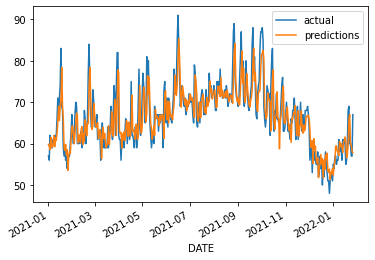

In [54]:
combo.plot()

## Prediction Function

In [55]:
def creating_predictions(predictors, core, reg):
    train_data = core.loc[:'2020-12-31'].copy()
    test_data = core.loc['2021-01-01':].copy()
    reg.fit(train_data[predictors], train_data['target'])
    predictions = reg.predict(test_data[predictors])
    error = mean_absolute_error(test_data['target'], predictions)
    combo = pd.concat([test_data['target'], pd.Series(predictions, index = test_data.index)], axis = 1)
    combo.columns = ['actual', 'predictions']
    return error, combo

## Adding Rolling Mean and Monthly Average to Predictors

In [56]:
weather['month_max'] = weather['tmax'].rolling(30).mean()

In [57]:
weather

,station,name,prcp,tmax,tmin,target,month_max
DATE,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,49.0,30.0,49.0,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,49.0,29.0,54.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,54.0,35.0,54.0,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,54.0,36.0,55.0,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...,...,...
2022-01-22,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,69.0,44.0,60.0,56.833333
2022-01-23,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,60.0,41.0,60.0,56.900000
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,60.0,39.0,57.0,57.066667


In [58]:
weather['month_day_max'] = weather['month_max']/ weather['tmax']

In [59]:
weather['max_min'] = weather['tmax']/weather['tmin']

In [60]:
predictors = ['prcp','tmax', 'tmin', 'month_max','month_day_max','max_min']

In [61]:
weather = weather.iloc[30:].copy()

In [64]:
error, combo = creating_predictions(predictors,weather,reg)

In [65]:
error

3.368509396568054

In [66]:
combo

,actual,predictions
DATE,,
2021-01-01,57.0,60.496091
2021-01-02,56.0,59.010076
2021-01-03,62.0,58.232170
2021-01-04,59.0,61.762064
2021-01-05,59.0,59.795076
...,...,...
2022-01-22,60.0,65.510171
2022-01-23,60.0,59.486460
2022-01-24,57.0,59.347108


<AxesSubplot:xlabel='DATE'>

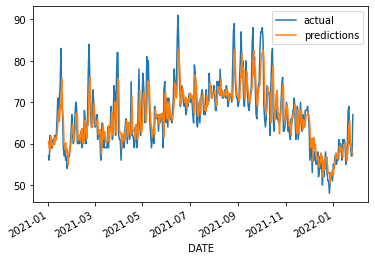

In [67]:
combo.plot()

In [69]:
weather['monthly_avg'] = weather['tmax'].groupby(weather.index.month).apply(lambda x: x.expanding(1).mean())

In [70]:
weather

,station,name,prcp,tmax,tmin,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,,,
1960-01-31,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...,...,...
2022-01-22,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.00,69.0,44.0,60.0,56.833333,0.823671,1.568182,56.779267
2022-01-23,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803


In [71]:
predictors = ['prcp','tmax', 'tmin', 'month_max','month_day_max','max_min','monthly_avg']

In [73]:
error,combo = creating_predictions(predictors,weather,reg)

In [74]:
error

3.336298281899352

In [75]:
combo

,actual,predictions
DATE,,
2021-01-01,57.0,59.691464
2021-01-02,56.0,57.783647
2021-01-03,62.0,57.103777
2021-01-04,59.0,60.861317
2021-01-05,59.0,59.002318
...,...,...
2022-01-22,60.0,65.090638
2022-01-23,60.0,59.326801
2022-01-24,57.0,59.275635


In [76]:
weather.corr()['target']

prcp            -0.205417
tmax             0.821653
tmin             0.596047
target           1.000000
month_max        0.686859
month_day_max   -0.421594
max_min          0.045235
monthly_avg      0.689826
Name: target, dtype: float64

In [79]:
combo['diff'] = (combo['actual'] - combo['predictions']).abs()
combo.sort_values('diff', ascending = False).head()

,actual,predictions,diff
DATE,,,
2021-01-17,83.0,68.686057,14.313943
2021-04-01,62.0,75.408557,13.408557
2021-05-07,81.0,67.731735,13.268265
2021-10-16,66.0,78.804140,12.804140
2021-02-22,84.0,71.202184,12.797816


We have created a function that predicts the weather with an average of 3.32 degrees error(above or below).

## Next Possible Steps

If we were to take this to the next level, some things that could be done are:
- Adding more 'predictors' to make a more accurate model
- Adding more data through other weather data sources
- Try other models and backtest
